# softmax回归的简洁实现

通过深度学习框架的高级API能够使实现
softmax
回归变得更加容易

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Softmax回归的输出层是一个全连接层

In [2]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

# 初始化神经网络的权重
def init_weights(m):
    if type(m) == nn.Linear:# 如果当前层是线性层
        nn.init.normal_(m.weight, std=0.01)# 对当前线性层的权重进行初始化，从正态分布中随机采样，标准差为 0.01

net.apply(init_weights);

在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数

In [3]:
loss = nn.CrossEntropyLoss(reduction='none')

使用学习率为0.1的小批量随机梯度下降作为优化算法

In [4]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

调用
之前
定义的训练函数来训练模型

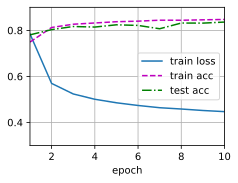

In [5]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

走到这一步，很多人可能会报下面的错

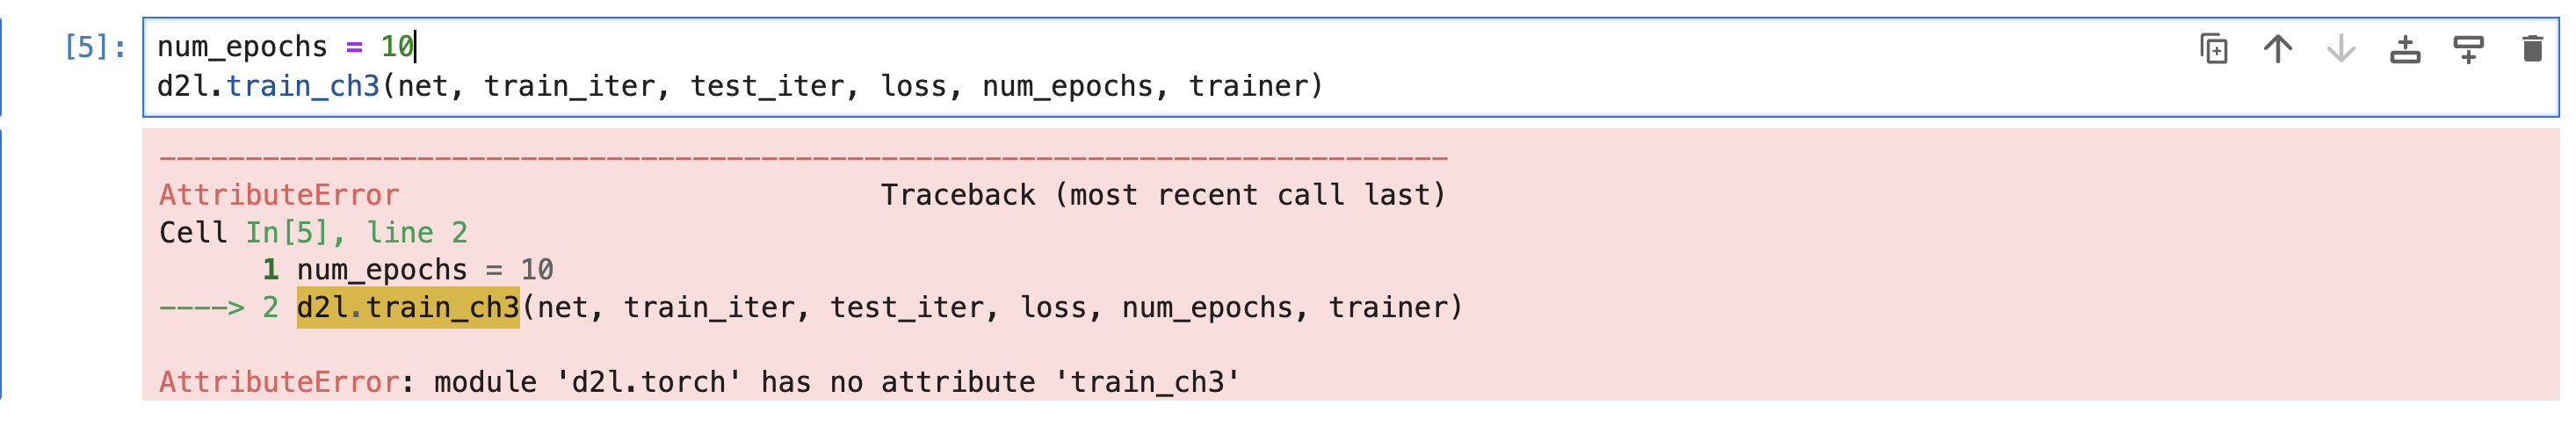

原因是d2l包版本的问题，目前我的d2l版本为1.0.3

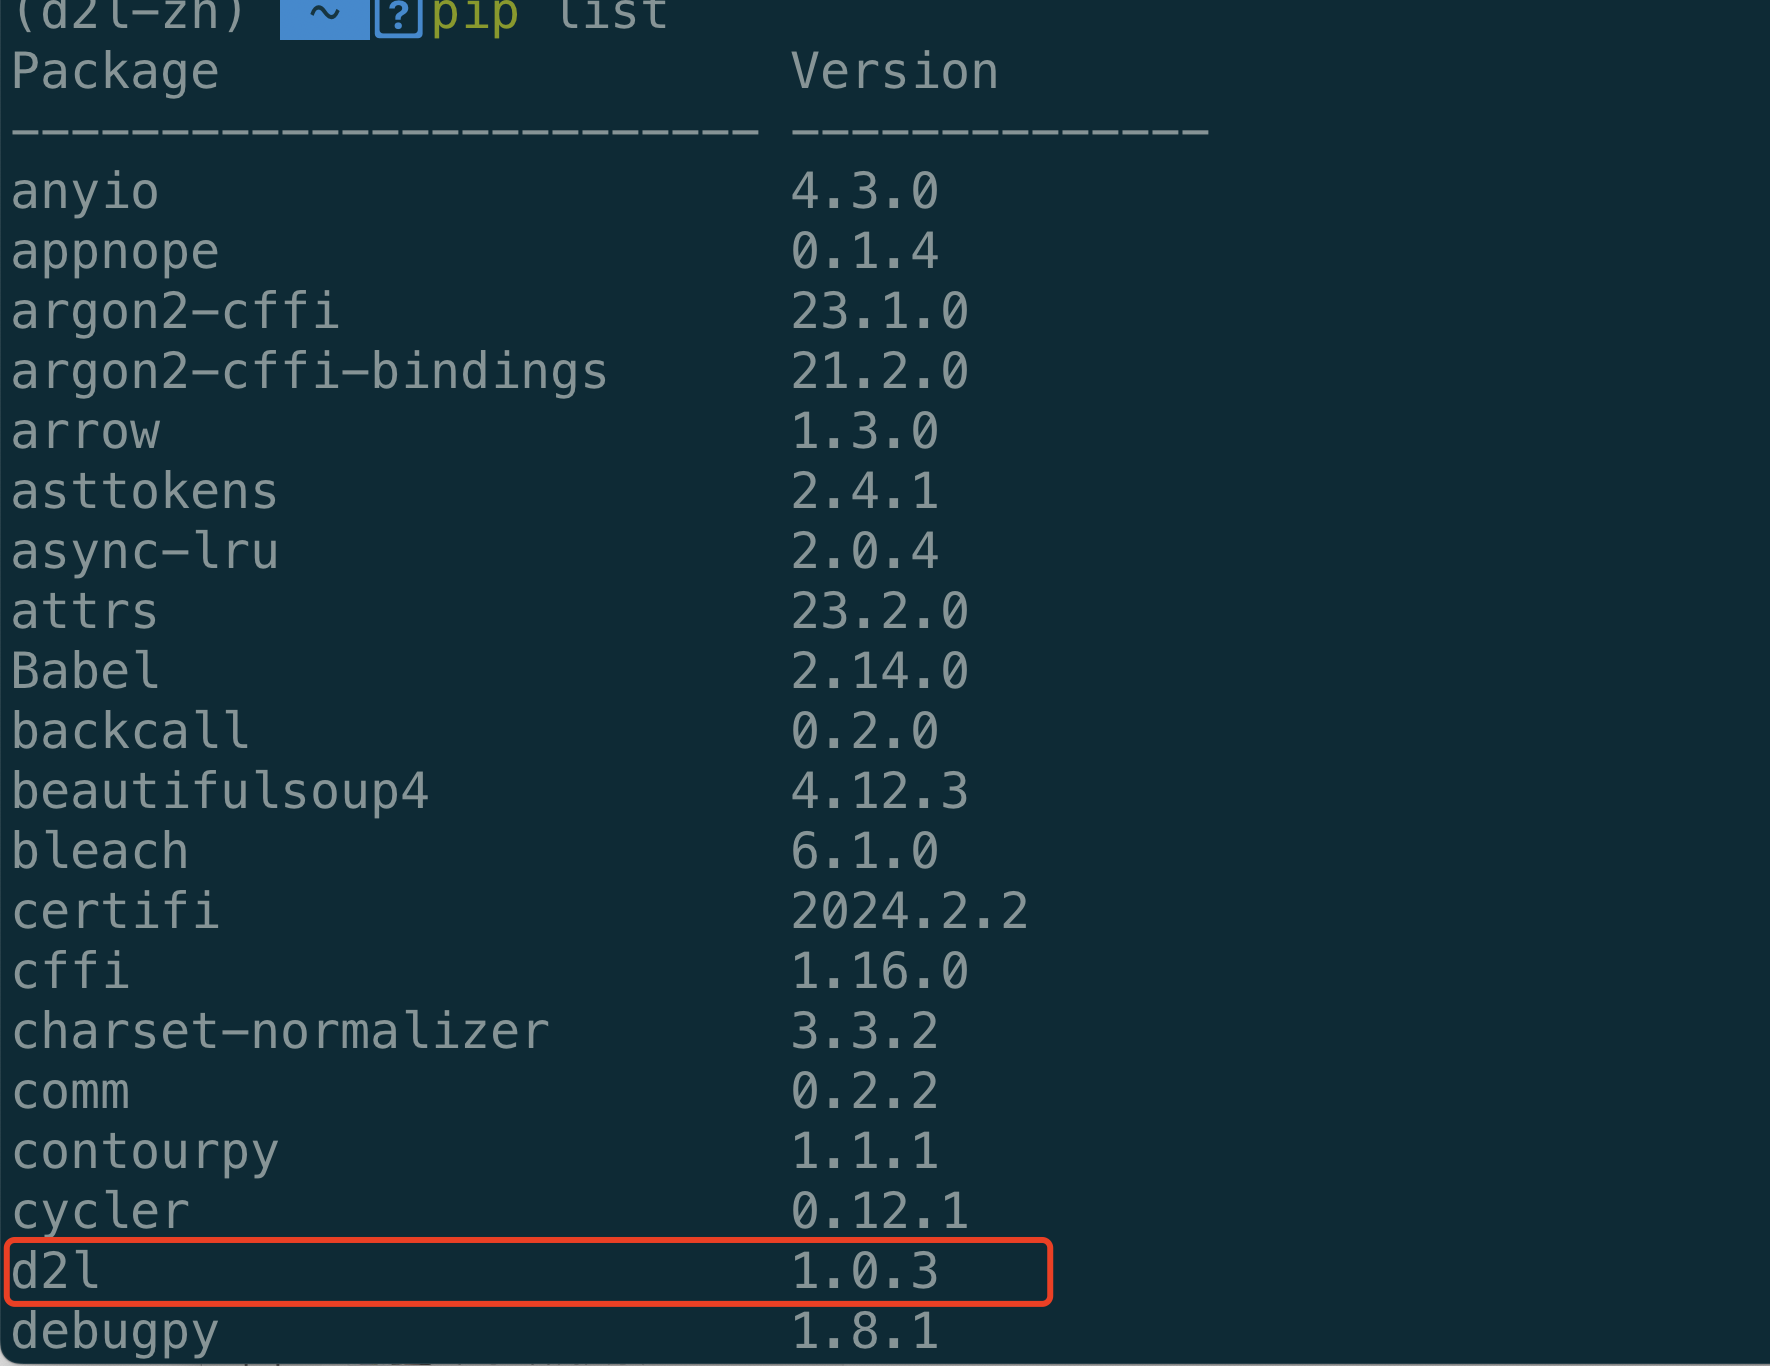

需要卸载这个版本

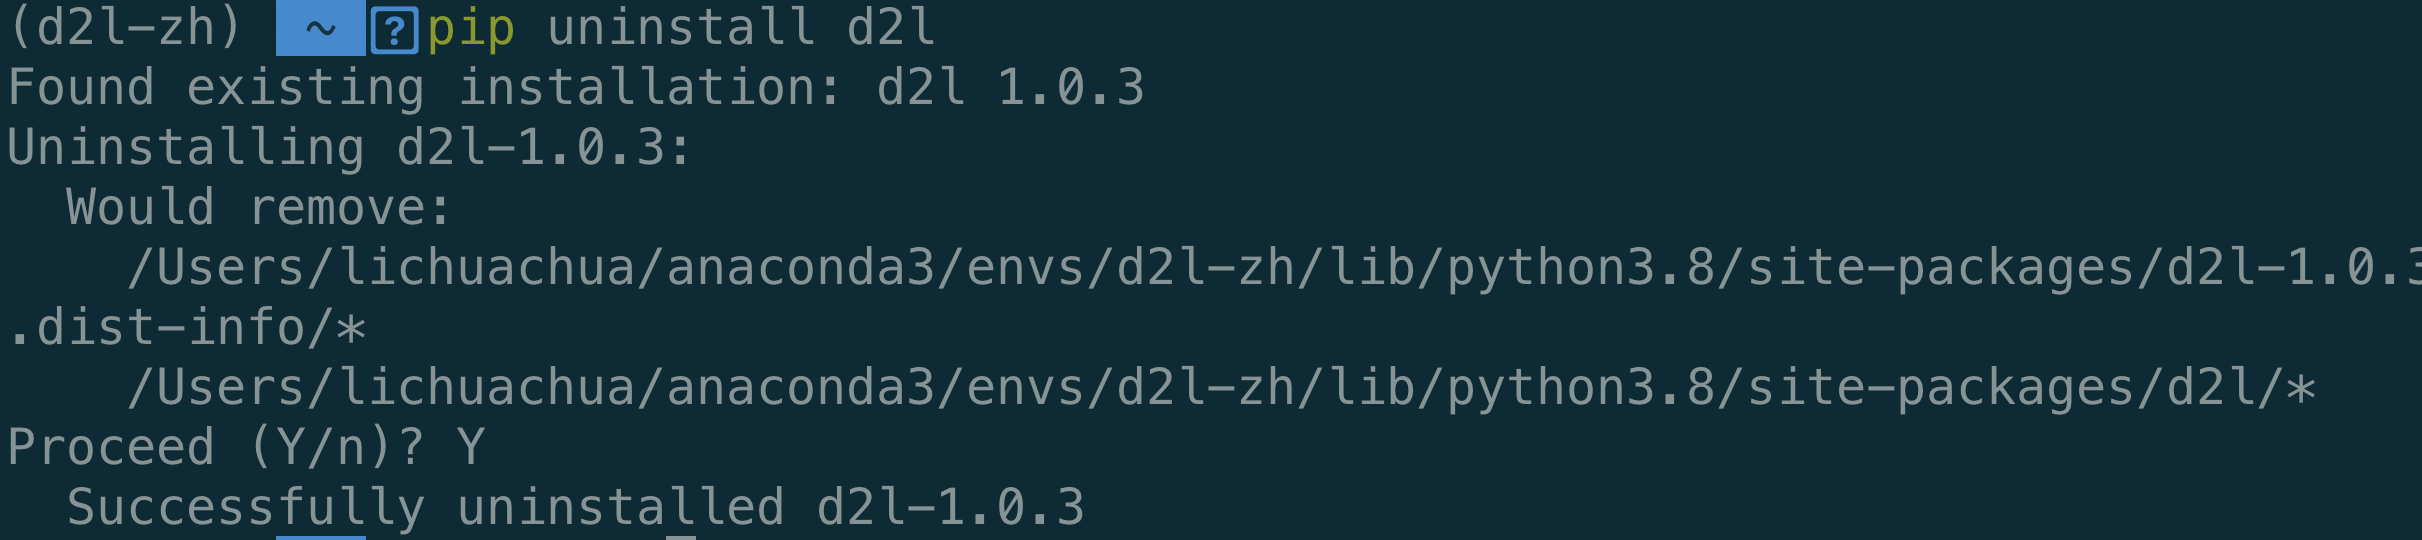

下载0.17.6的版本

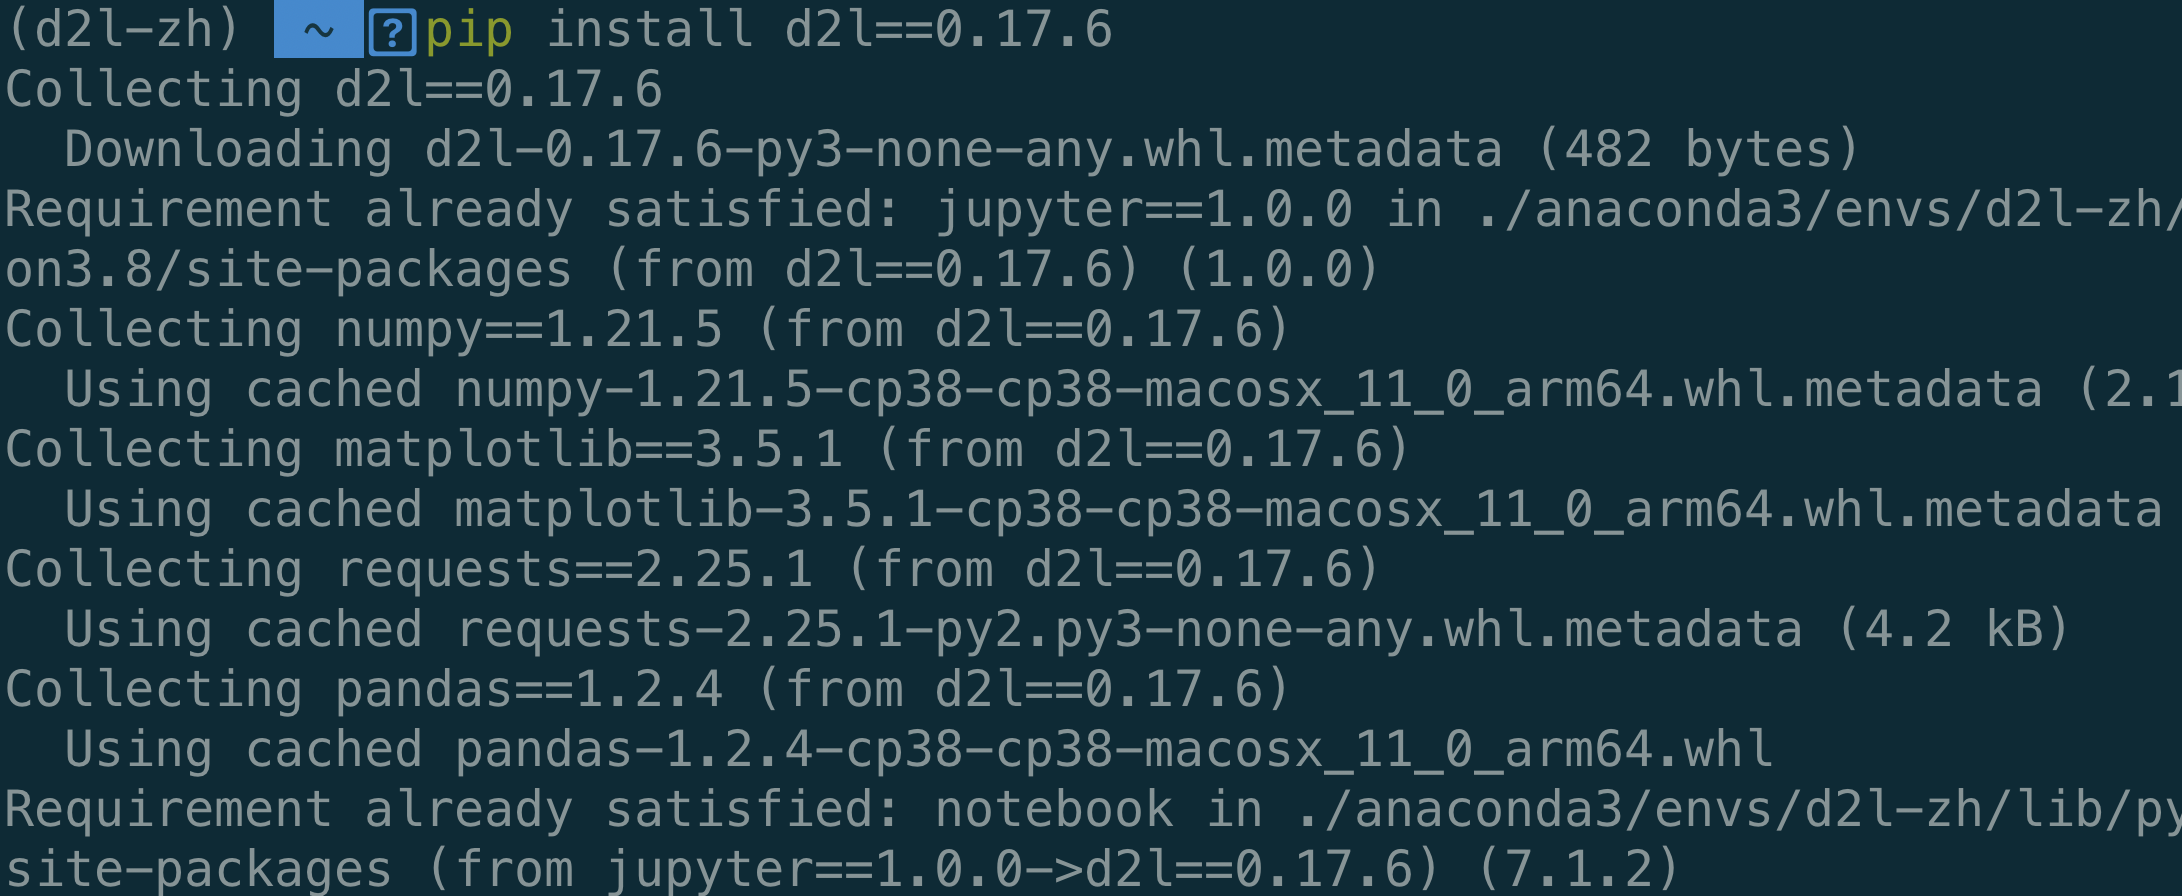

再次运行上面报错的代码即可。
还有就是直接查看源码中的函数，发现和上一节使用的函数实现一摸一样，直接复制到本文件中使用即可。